<a href="https://colab.research.google.com/github/lfarlima/Credit-Risk-Analysis/blob/master/REAL_ESTATE_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **PART 1**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

[Link to download dataset](https://kaggle.com/datasets/sergiygavrylov/25000-canadian-rental-housing-market-june-2024), which needs to be uploaded each time to run the project

In [3]:
df = pd.read_csv("rentfaster.csv",index_col="rentfaster_id")
df.head()

,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
rentfaster_id,,,,,,,,,,,,,,,,,
468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2695.0,3 Beds,2.5,1496,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2295.0,2 Beds,2.5,1180,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2095.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,November 18,Non-Smoking,True,True
468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, 468622 to 334284
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city               25771 non-null  object 
 1   province           25771 non-null  object 
 2   address            25646 non-null  object 
 3   latitude           25771 non-null  float64
 4   longitude          25771 non-null  float64
 5   lease_term         25725 non-null  object 
 6   type               25771 non-null  object 
 7   price              25771 non-null  float64
 8   beds               25639 non-null  object 
 9   baths              25637 non-null  object 
 10  sq_feet            21659 non-null  object 
 11  link               25771 non-null  object 
 12  furnishing         25771 non-null  object 
 13  availability_date  25759 non-null  object 
 14  smoking            23069 non-null  object 
 15  cats               25598 non-null  object 
 16  dogs               25

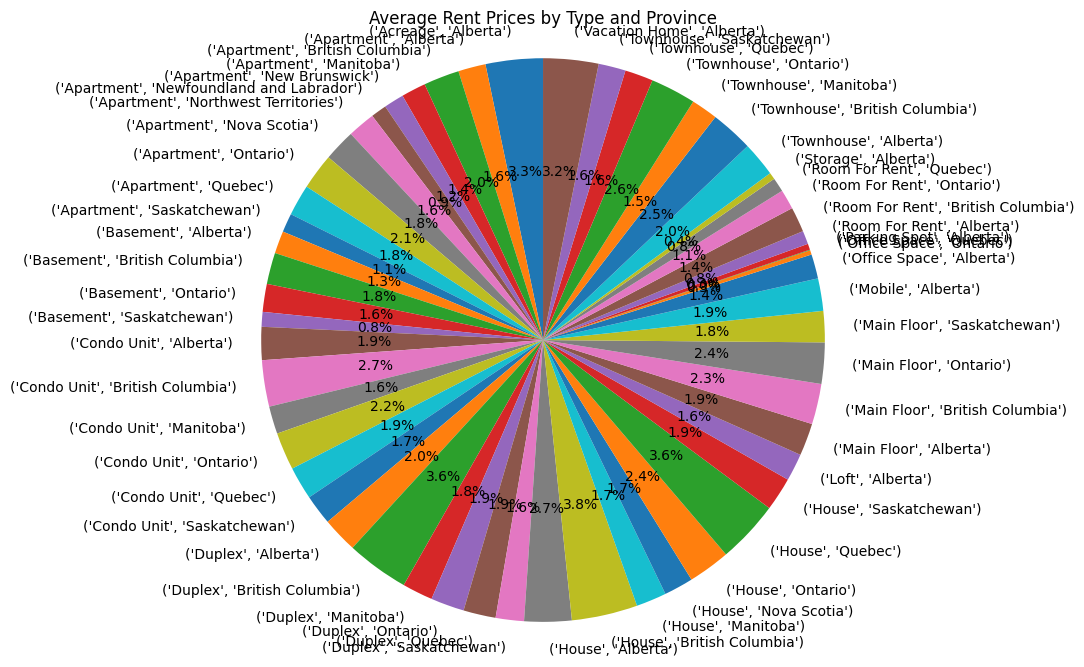

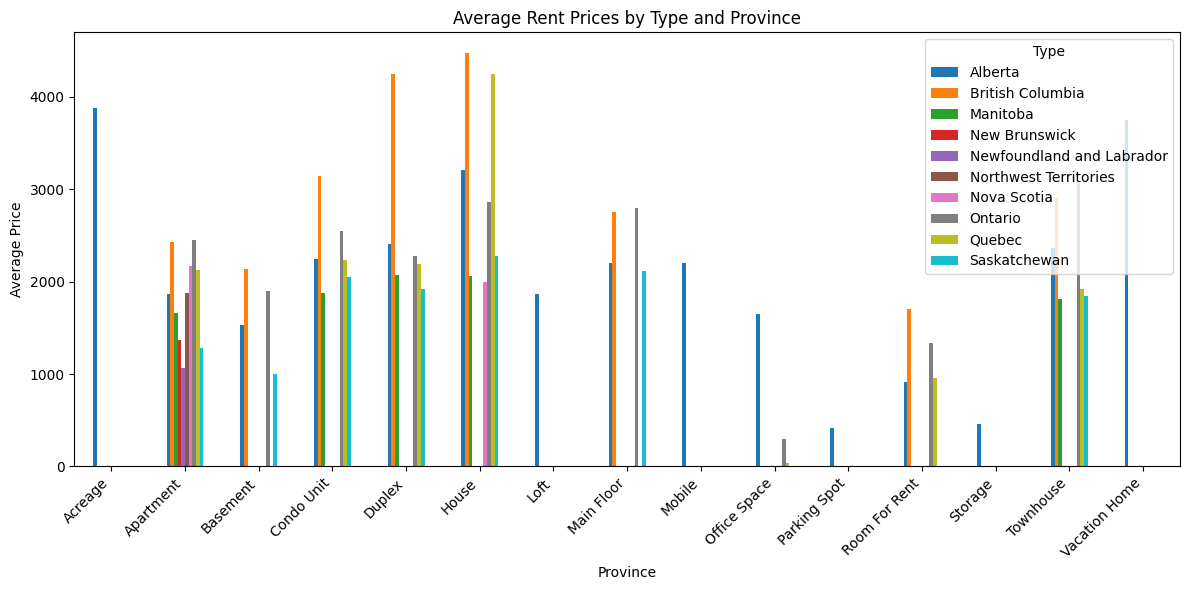

In [47]:
# Create a pie chart of average prices grouped by type and province, drop NaN. then create a bar graph of the same data

# Group by type and province, calculate average price, and drop NaN values
grouped = df.groupby(['type', 'province'])['price'].mean().dropna()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%', startangle=90)
plt.title('Average Rent Prices by Type and Province')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie
plt.show()

# Bar chart
grouped.unstack().plot(kind='bar', figsize=(12, 6))
plt.title('Average Rent Prices by Type and Province')
plt.xlabel('Province')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Type')
plt.tight_layout()
plt.show()


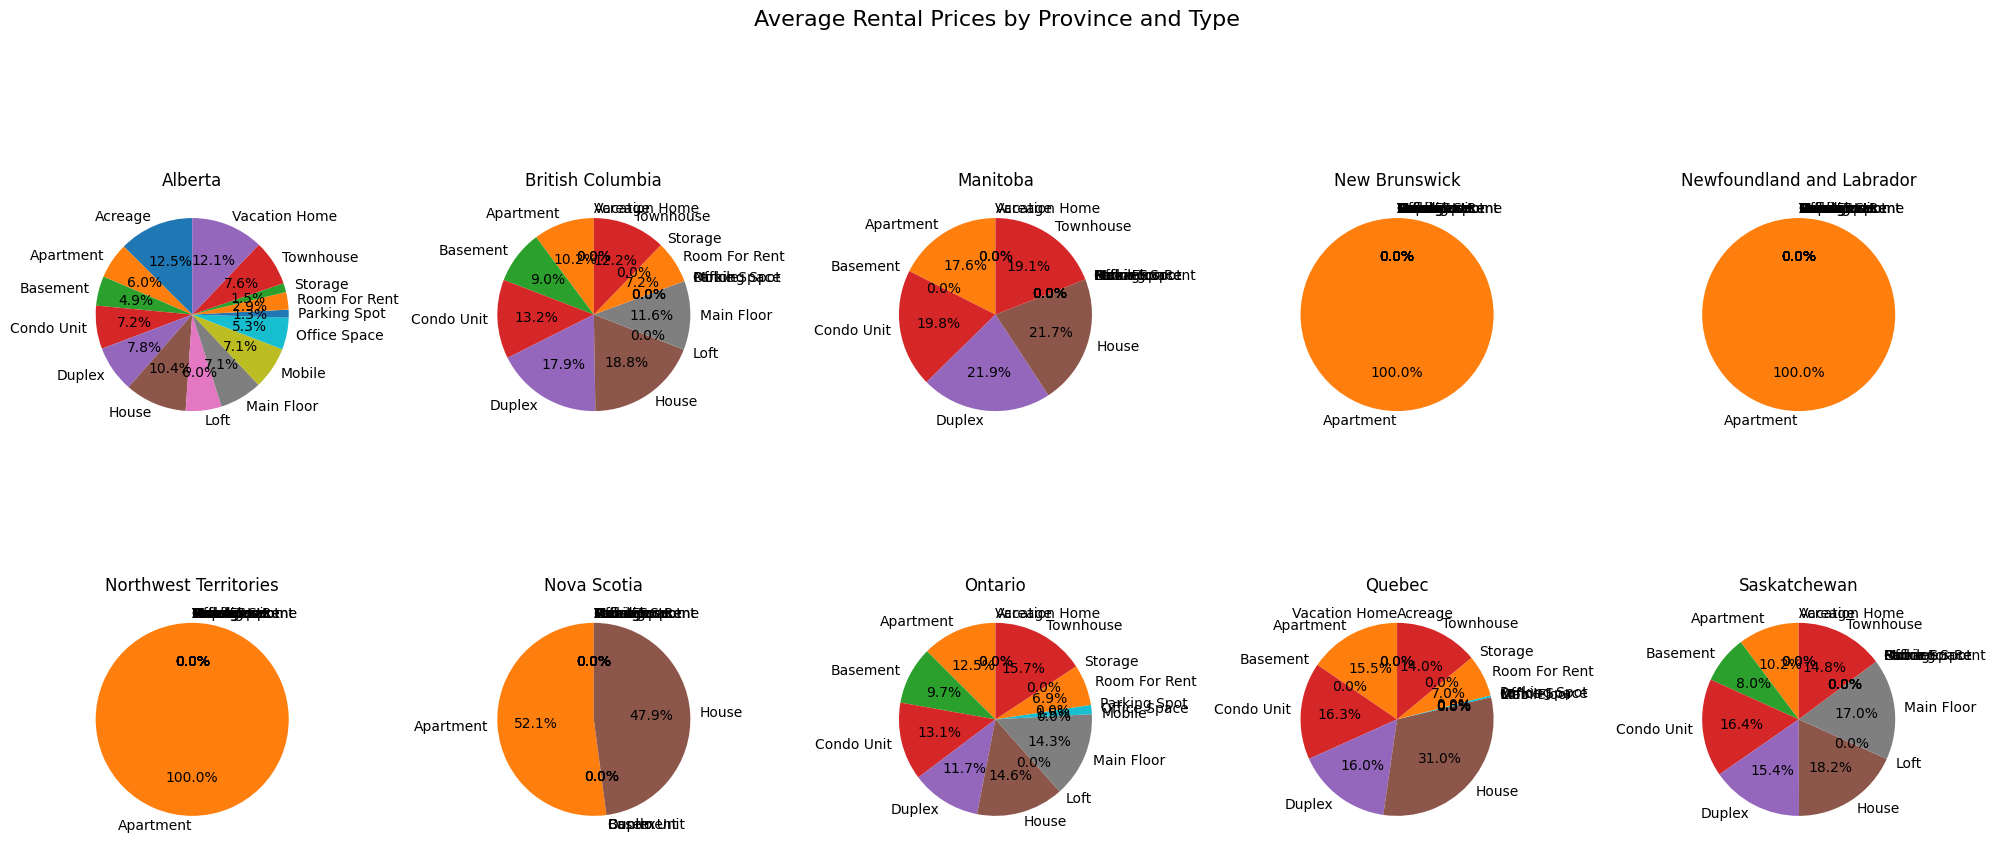

In [46]:
# Group by province, calculate average price by type and province, and drop NaN values. use the province for indexing, then display the results as pie charts in a 2x5 matrix

# Group by province and type, calculate average price
avg_price = df.groupby(['province', 'type'])['price'].mean().unstack().fillna(0)

# Plotting pie charts
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.suptitle('Average Rental Prices by Province and Type', fontsize=16)

provinces = avg_price.index.tolist()
types = avg_price.columns.tolist()

for i, province in enumerate(provinces):
    row = i // 5
    col = i % 5
    ax = axes[row, col]
    ax.pie(avg_price.loc[province], labels=types, autopct='%1.1f%%', startangle=90)
    ax.set_title(province)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


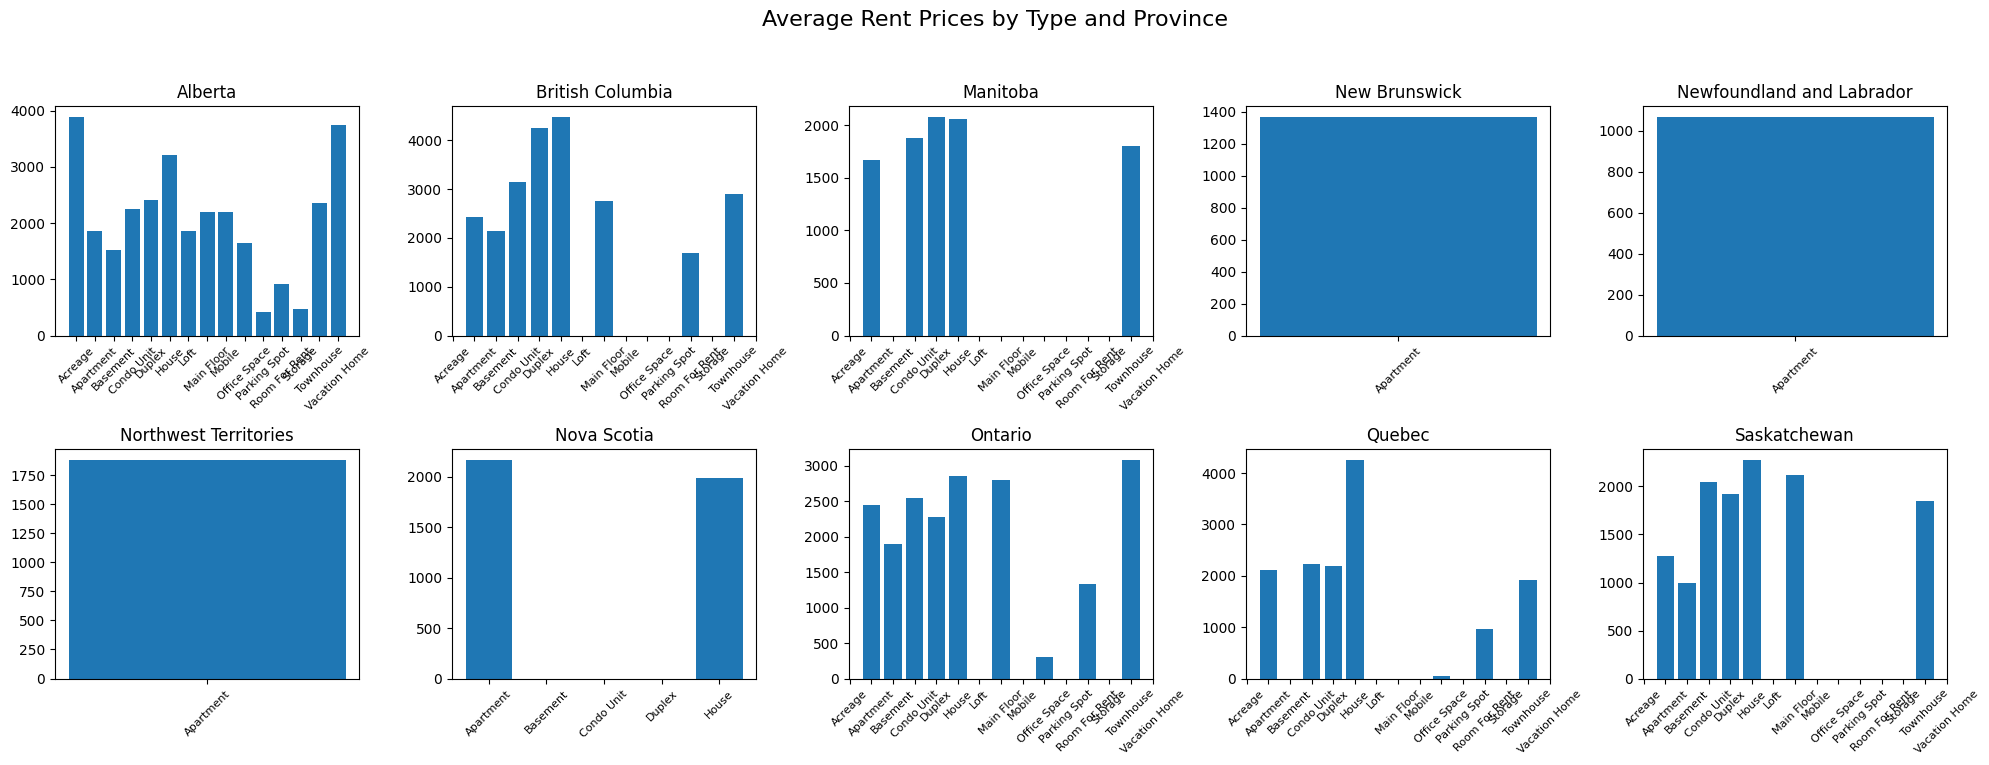

In [48]:
# prompt: # Group by province, calculate average price by type and province, and drop NaN values, then display the chart results in a 2x5 matrix

# Group by province, calculate average price by type and province, and drop NaN values
grouped_province = df.groupby(['province', 'type'])['price'].mean().dropna().unstack()

# Create a 2x5 matrix of subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
fig.suptitle('Average Rent Prices by Type and Province', fontsize=16)

# Iterate over provinces and plot in the matrix
for i, province in enumerate(grouped_province.index):
    row = i // 5
    col = i % 5
    axes[row, col].bar(grouped_province.columns, grouped_province.loc[province])
    axes[row, col].set_title(province)
    axes[row, col].tick_params(axis='x', rotation=45, labelsize=8)

# Adjust layout and display
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


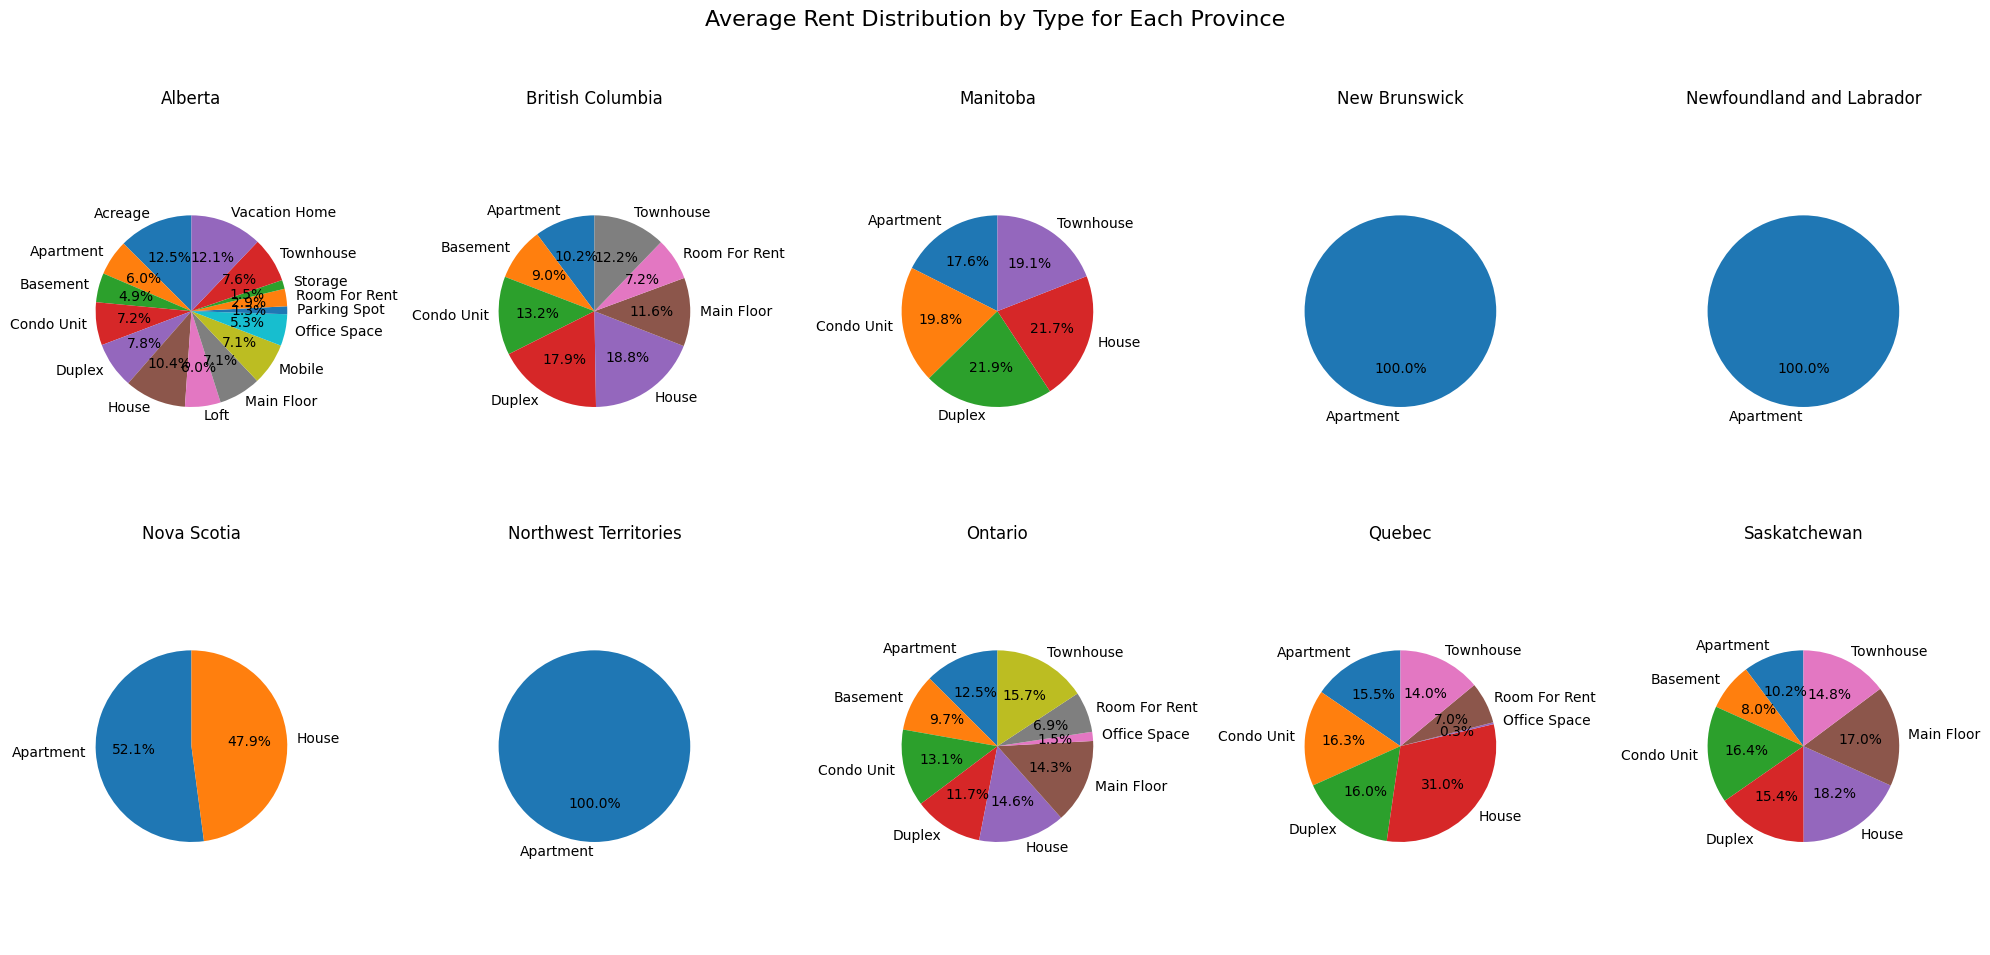

In [49]:
# Group by province and type, calculate average price, and drop NaN values
grouped_province_type = df.groupby(['province', 'type'])['price'].mean().dropna()

# Create a pie chart for each province
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.suptitle('Average Rent Distribution by Type for Each Province', fontsize=16)

provinces = df['province'].unique()
for i, province in enumerate(provinces):
  row = i // 5
  col = i % 5
  province_data = grouped_province_type.loc[province]
  axes[row, col].pie(province_data, labels=province_data.index, autopct='%1.1f%%', startangle=90)
  axes[row, col].set_title(f'{province}')
  axes[row, col].axis('equal')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


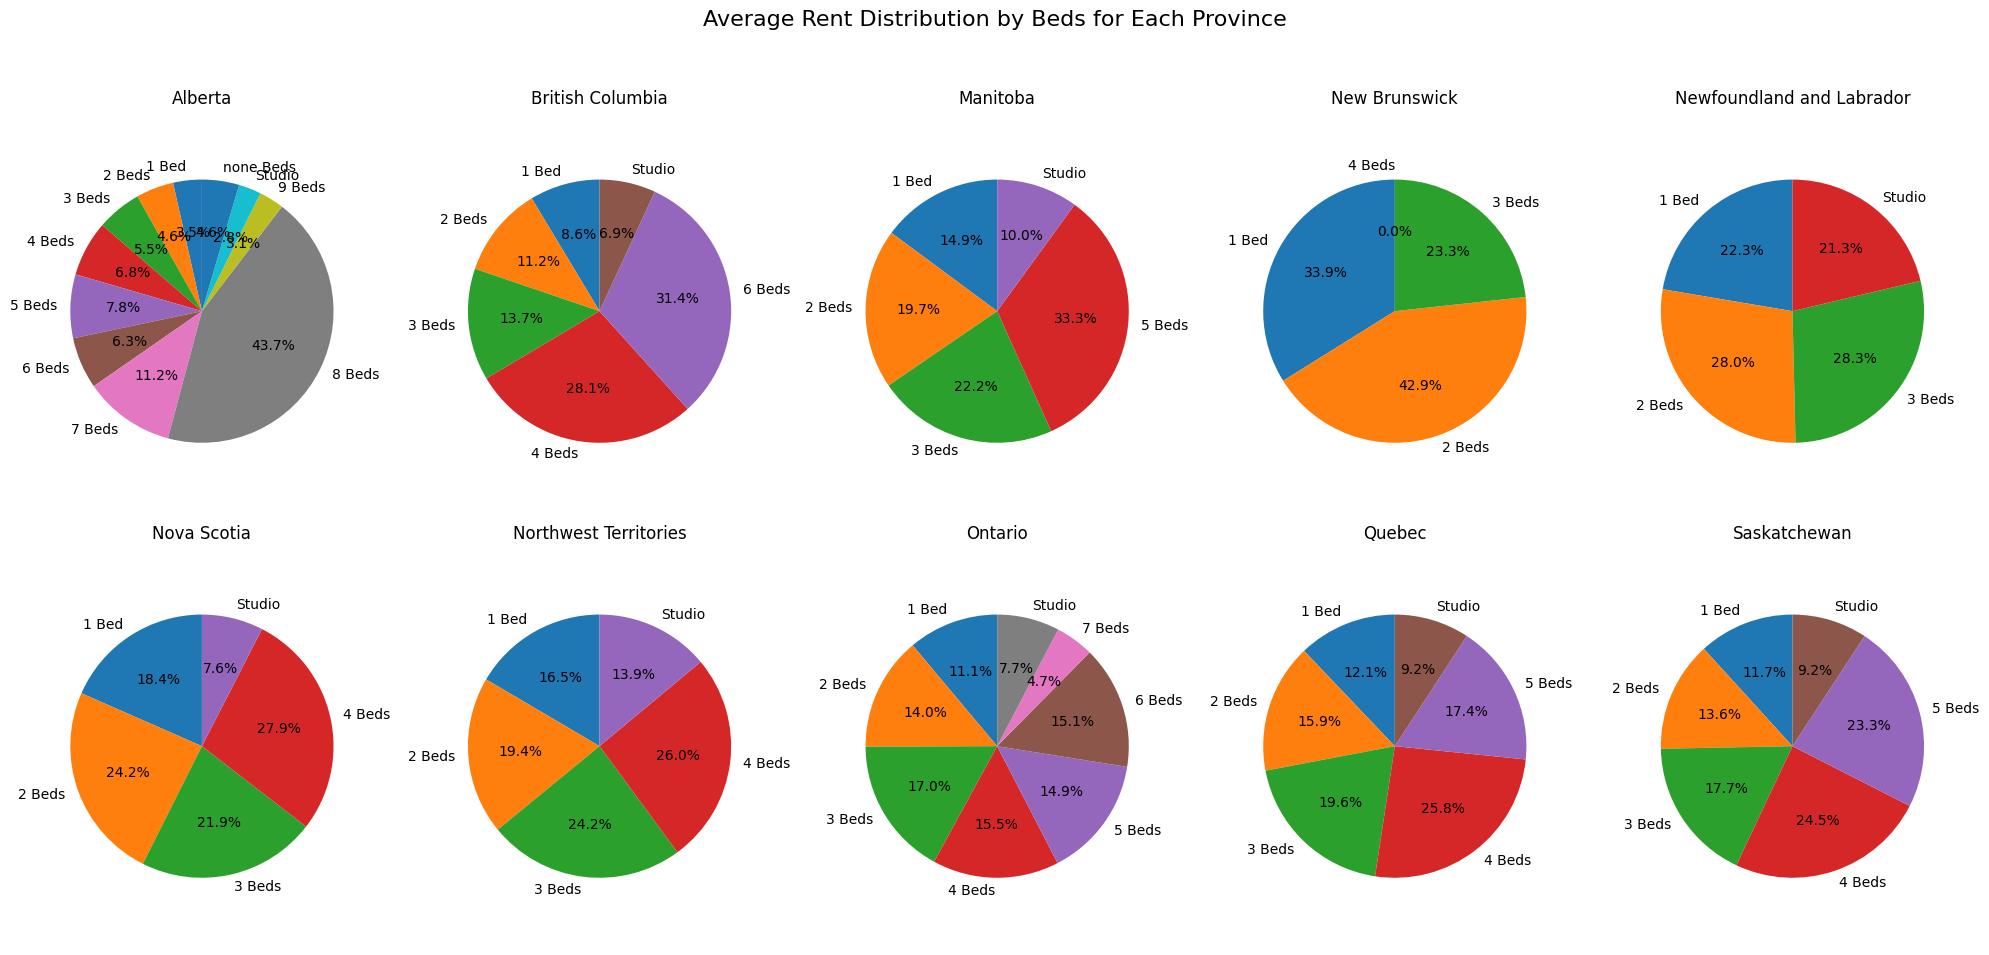

In [50]:
# prompt: create a pie chart of average rental prices grouped by beds, drop NaN, for each province. then display the results in a 2x5 matrix

# Group by province and beds, calculate average price, and drop NaN values
grouped_province_beds = df.groupby(['province', 'beds'])['price'].mean().dropna()

# Create a pie chart for each province
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.suptitle('Average Rent Distribution by Beds for Each Province', fontsize=16)

provinces = df['province'].unique()
for i, province in enumerate(provinces):
  row = i // 5
  col = i % 5
  province_data = grouped_province_beds.loc[province]
  axes[row, col].pie(province_data, labels=province_data.index, autopct='%1.1f%%', startangle=90)
  axes[row, col].set_title(f'{province}')
  axes[row, col].axis('equal')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


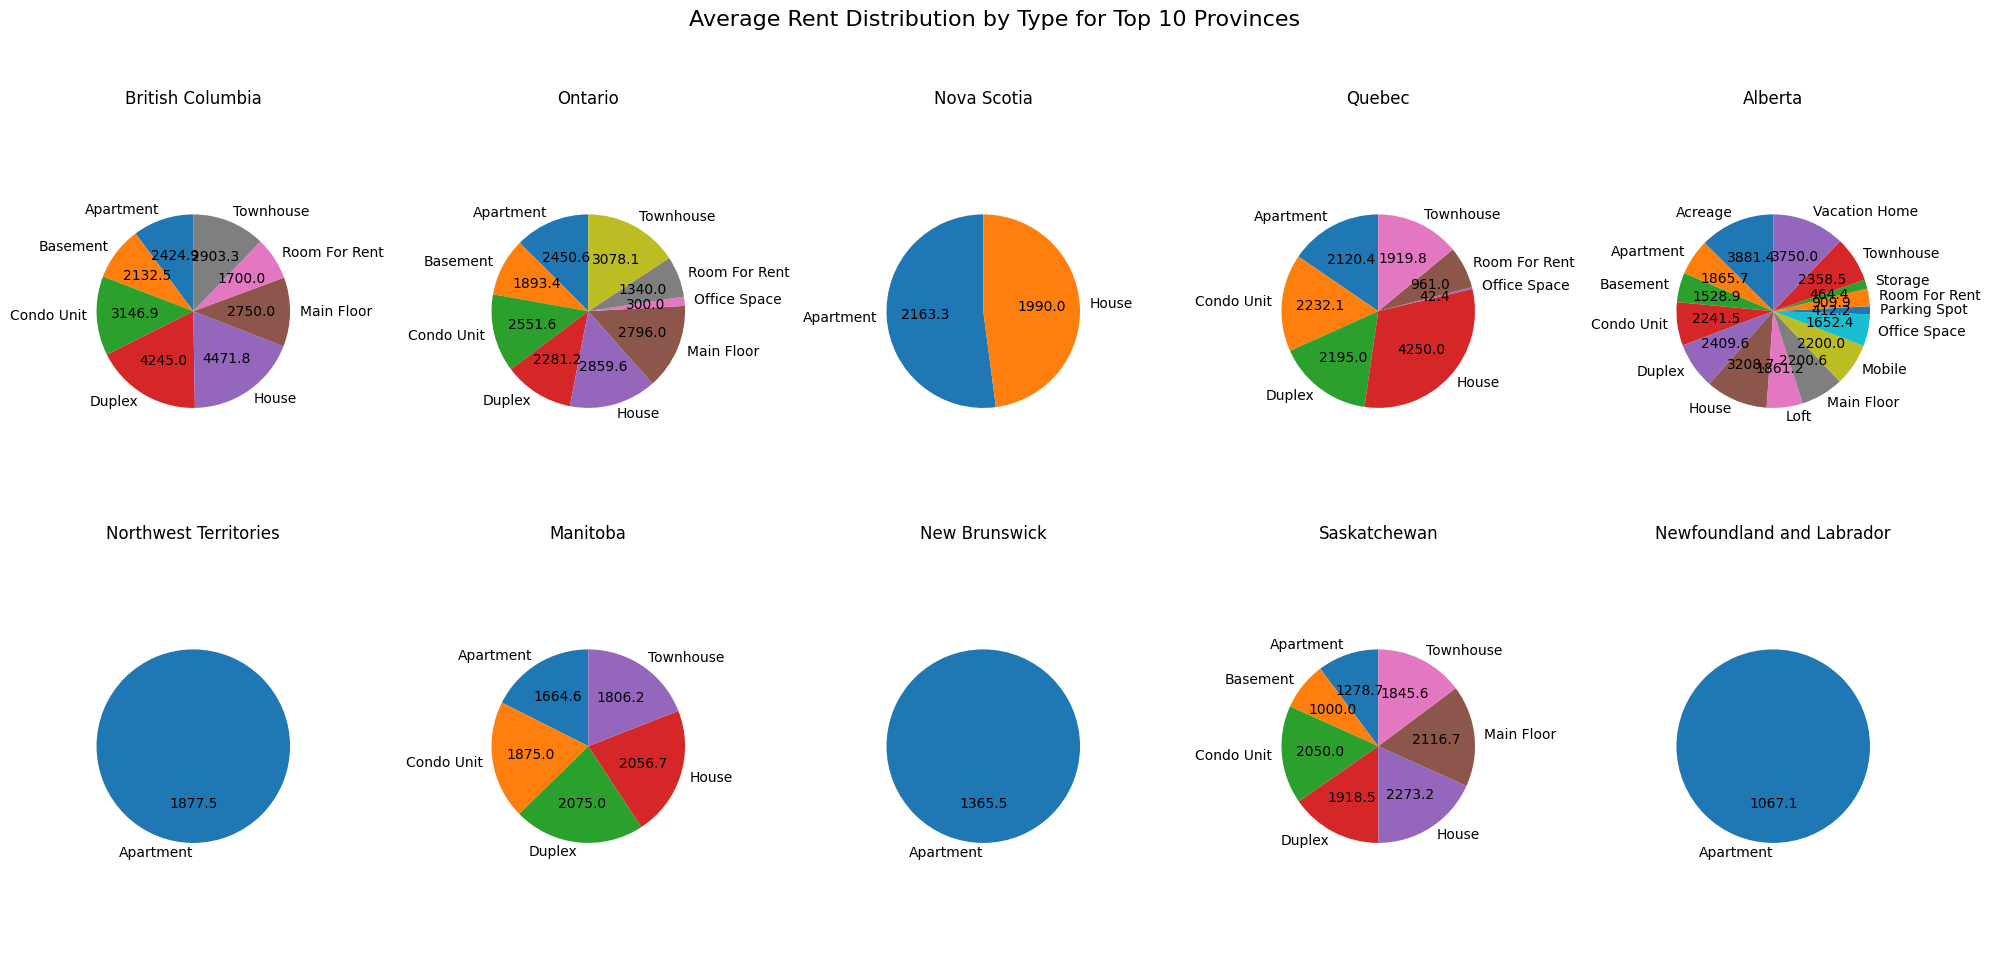

In [67]:
# prompt: Create a pie chart of top_10_provinces, grouped by type, and show the average price values directly in the pie chart


# Calculate average price by province and sort in descending order
province_avg_price = df.groupby('province')['price'].mean().sort_values(ascending=False)

# Select top 10 provinces
top_10_provinces = province_avg_price.head(10).index

# Filter the DataFrame for top 10 provinces
top_10_df = df[df['province'].isin(top_10_provinces)]

# Group by province and type, calculate average price, and drop NaN values
top_10_grouped = top_10_df.groupby(['province', 'type'])['price'].mean().dropna()

# Create a pie chart for each province
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.suptitle('Average Rent Distribution by Type for Top 10 Provinces', fontsize=16)

for i, province in enumerate(top_10_provinces):
  row = i // 5
  col = i % 5
  province_data = top_10_grouped.loc[province]
  # Create a pie chart with average price values displayed
  wedges, texts, autotexts = axes[row, col].pie(province_data, labels=province_data.index, autopct=lambda p: '{:.1f}'.format(p * sum(province_data) / 100), startangle=90)
  axes[row, col].set_title(f'{province}')
  axes[row, col].axis('equal')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


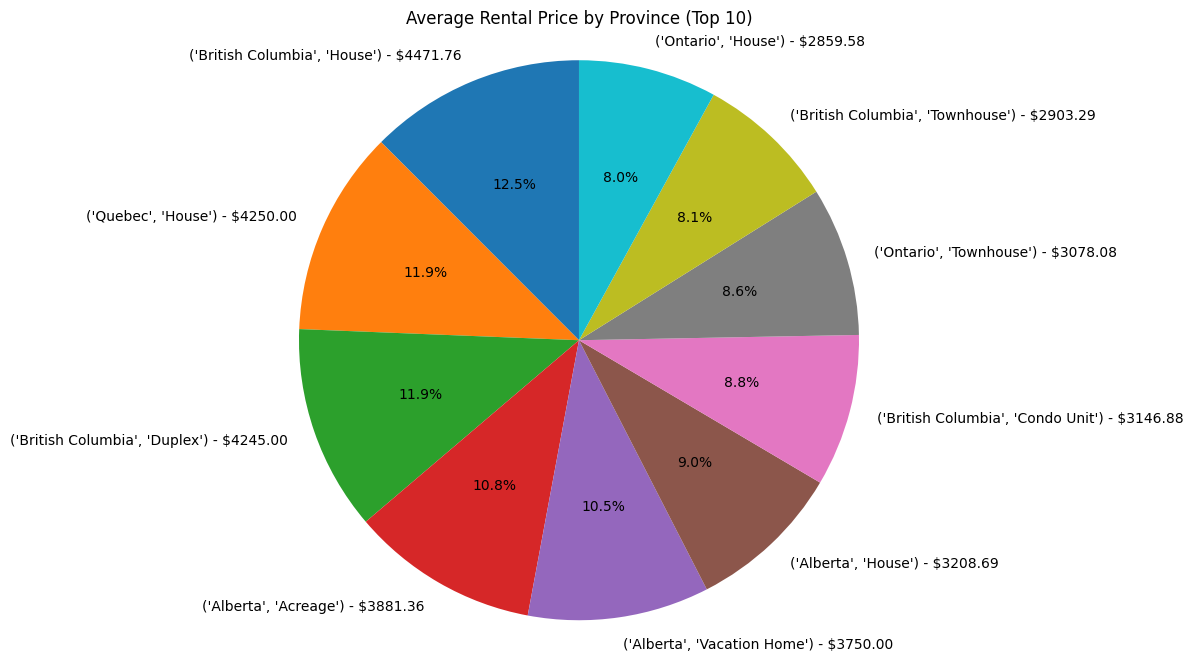

In [74]:
# Create a pie chart of top_10_provinces, show the average rental price by province in the chart, and show the average price values directly in the pie chart


# Calculate average price by province
avg_price_province = df.groupby(['province','type'])['price'].mean().sort_values(ascending=False)

# Select top 10 provinces
top_10_provinces = avg_price_province.head(10)

# Display average price values in the pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_10_provinces, labels=[f'{p} - ${v:.2f}' for p, v in zip(top_10_provinces.index, top_10_provinces.values)], autopct='%1.1f%%', startangle=90)
plt.title('Average Rental Price by Province (Top 10)')
plt.axis('equal')
plt.show()


province          type         
British Columbia  House            4471.764706
Quebec            House            4250.000000
British Columbia  Duplex           4245.000000
Alberta           Acreage          3881.363636
                  Vacation Home    3750.000000
                  House            3208.694158
British Columbia  Condo Unit       3146.875000
Ontario           Townhouse        3078.077187
British Columbia  Townhouse        2903.294118
Ontario           House            2859.575221
Name: price, dtype: float64


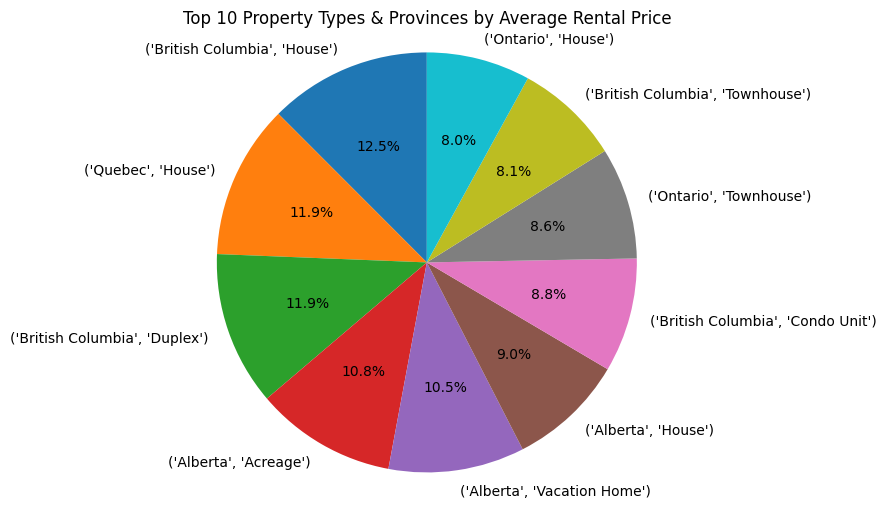

In [75]:
# Create a pie chart of top_10_provinces, show the average rental price by province in the chart
avg_price = df['price'].mean()
avg_price_by_province = df.groupby(['province','type'])['price'].mean().sort_values(ascending=False)
top_10_provinces = avg_price_by_province.head(10)
print(top_10_provinces)

# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(top_10_provinces, labels=top_10_provinces.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Property Types & Provinces by Average Rental Price')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


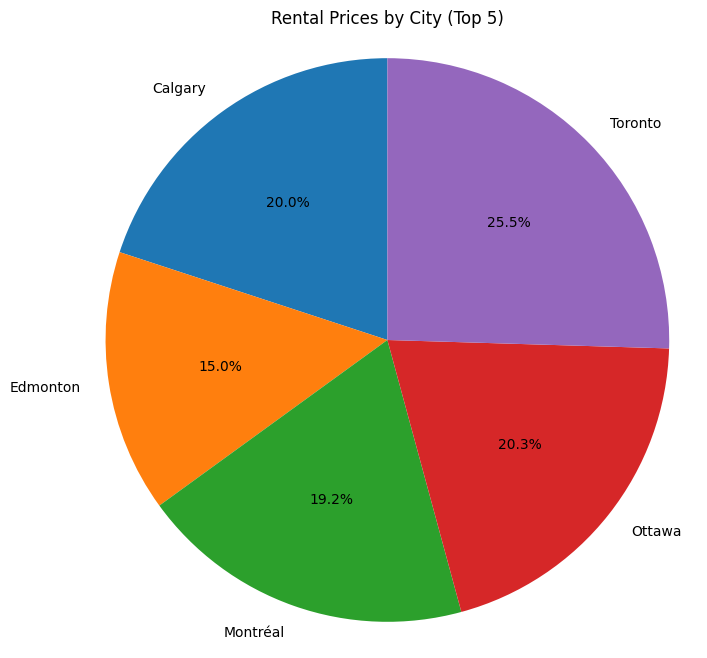

In [ ]:
# prompt: create a pie chart using rental prices by city for top 5 cities

import matplotlib.pyplot as plt
# Calculate rental prices by city for top 5 cities
top_cities = df['city'].value_counts().nlargest(5).index
city_prices = df[df['city'].isin(top_cities)].groupby('city')['price'].mean()
# print(city_prices)

# # # Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(city_prices, labels=city_prices.index, autopct='%1.1f%%', startangle=90)
plt.title('Rental Prices by City (Top 5)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


type
Acreage          3881.363636
Apartment        2125.436280
Basement         1559.205546
Condo Unit       2263.813830
Duplex           2406.076459
House            3185.349098
Loft             1861.160000
Main Floor       2207.386420
Mobile           2200.000000
Office Space     1161.620690
Parking Spot      412.244444
Room For Rent     919.588889
Storage           464.418605
Townhouse        2416.695835
Vacation Home    3750.000000
Name: price, dtype: float64


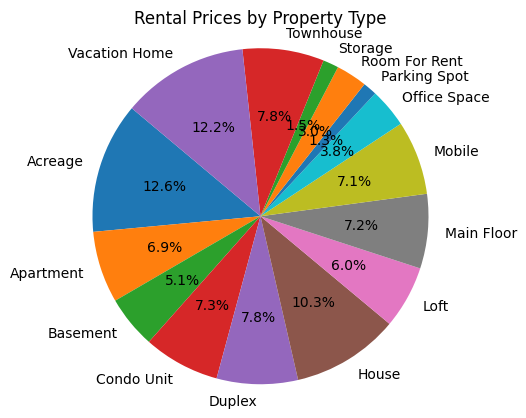

In [ ]:
# Aggregate rental prices by property type

price_by_type = df.groupby('type')['price'].mean()
print(price_by_type)
# Prepare data for the pie chart
labels = price_by_type.index
sizes = price_by_type.values
# colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']  # More colors can be added as needed

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

plt.title('Rental Prices by Property Type')
plt.show()


### **PART 2**

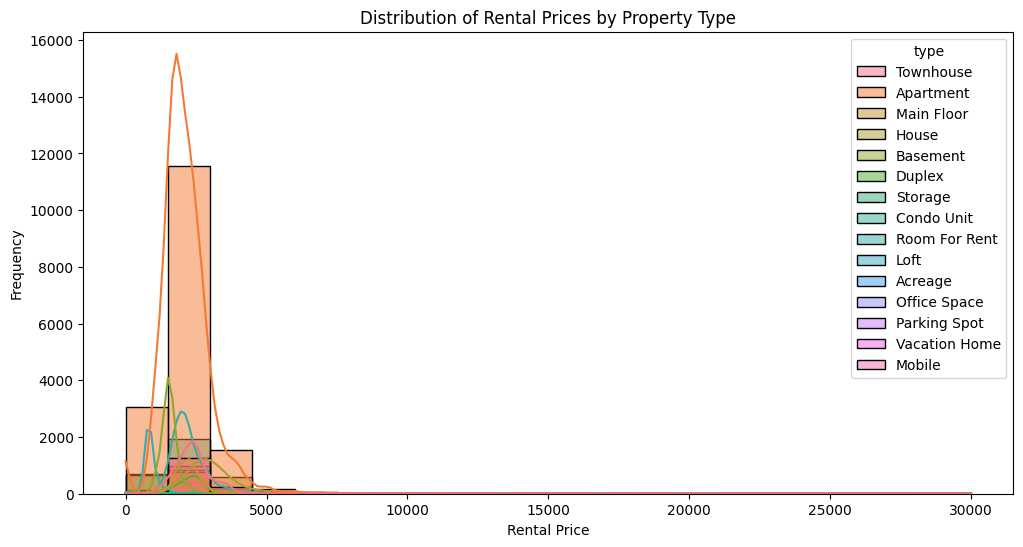

In [76]:
# prompt: create a histogram of rental prices and types by province

# ### **PART 2**
# Create a histogram of rental prices and types by province
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='price', hue='type', bins=20, kde=True)
plt.title('Distribution of Rental Prices by Property Type')
plt.xlabel('Rental Price')
plt.ylabel('Frequency')
plt.show()

In [78]:
# prompt: calculate the average price of unique beds by province
# Count the total number of beds grouped by beds and province
bed_counts = df.groupby(['beds', 'province'])['province'].count().reset_index(name='count')
print(bed_counts)

# Calculate the average price of unique beds by province
avg_price_by_beds = df.groupby(['province', 'beds'])['price'].mean().reset_index()
print("")
print(avg_price_by_beds)


         beds                   province  count
0       1 Bed                    Alberta   4362
1       1 Bed           British Columbia    484
2       1 Bed                   Manitoba    403
3       1 Bed              New Brunswick      5
4       1 Bed  Newfoundland and Labrador      4
5       1 Bed      Northwest Territories      6
6       1 Bed                Nova Scotia    113
7       1 Bed                    Ontario   2914
8       1 Bed                     Quebec    834
9       1 Bed               Saskatchewan    275
10     2 Beds                    Alberta   5377
11     2 Beds           British Columbia    438
12     2 Beds                   Manitoba    360
13     2 Beds              New Brunswick      6
14     2 Beds  Newfoundland and Labrador      4
15     2 Beds      Northwest Territories      9
16     2 Beds                Nova Scotia    103
17     2 Beds                    Ontario   2460
18     2 Beds                     Quebec    854
19     2 Beds               Saskatchewan

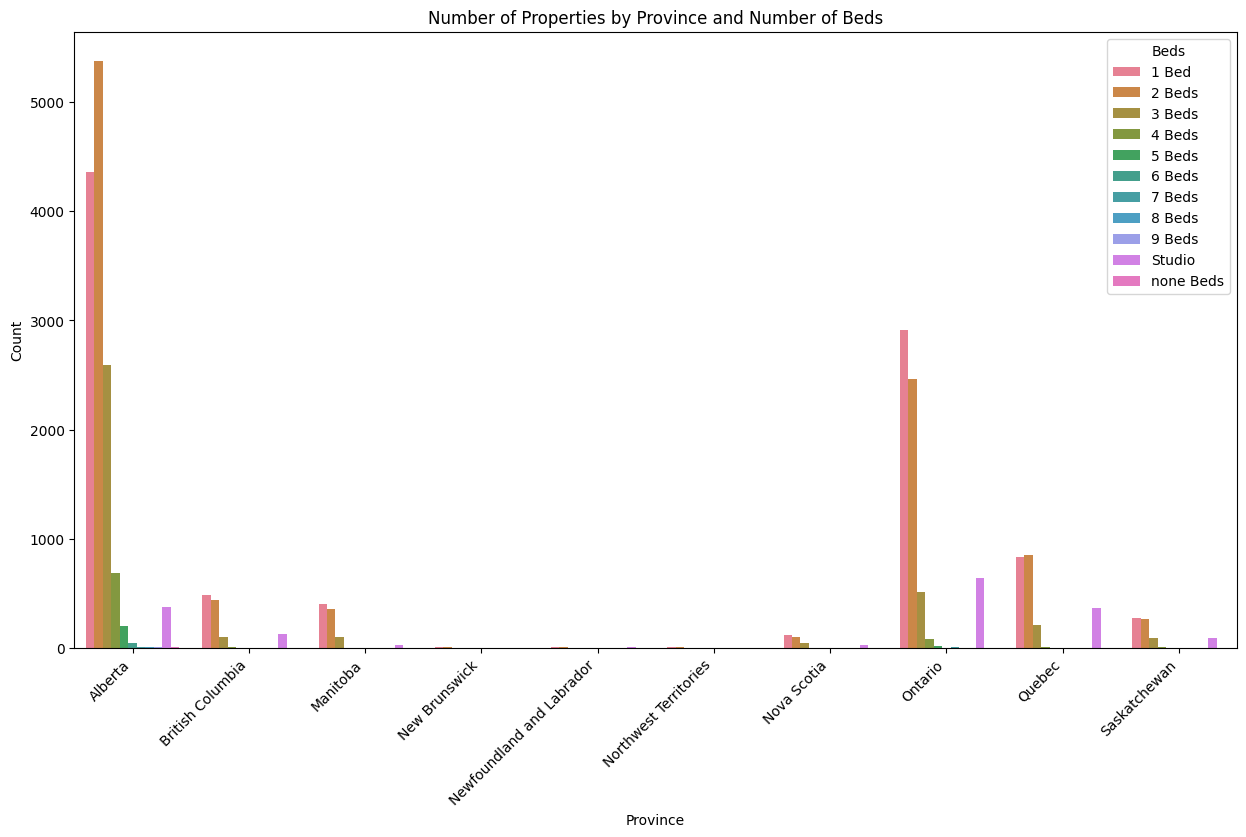

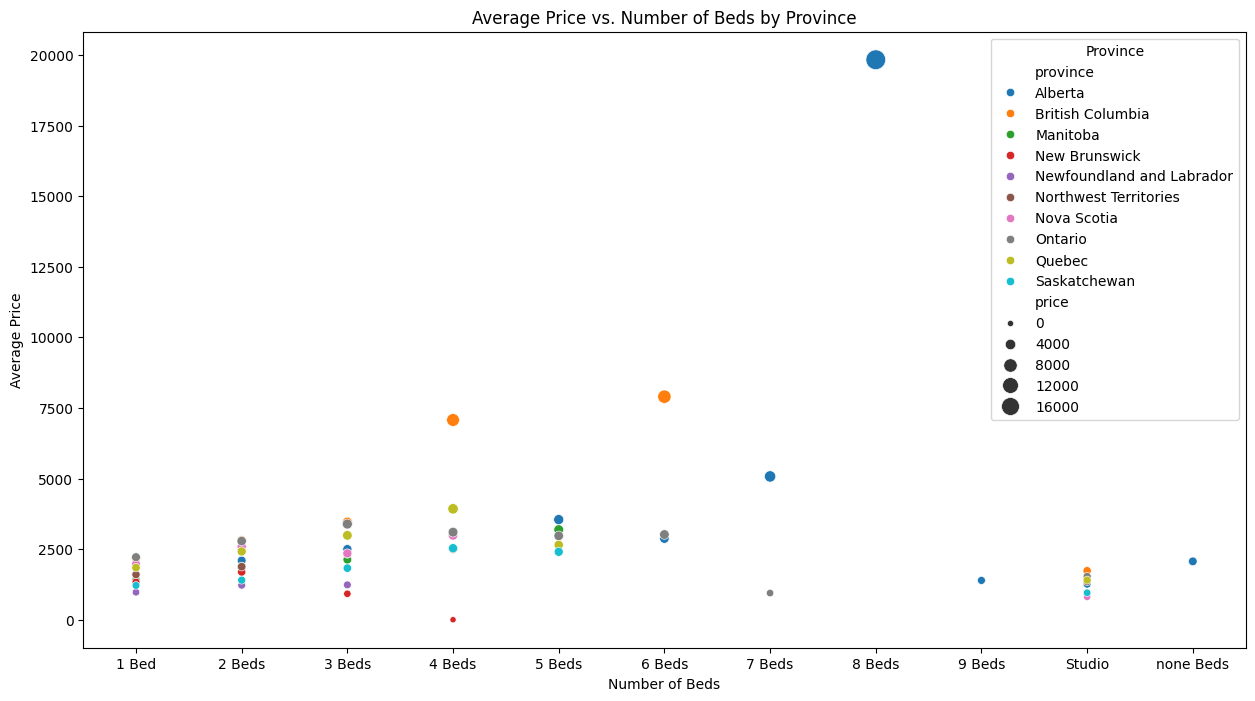

In [79]:
# prompt: create multiple suitable charts to display the data for avg_price_by_beds and bed_counts

# Create a bar chart for bed_counts
plt.figure(figsize=(15, 8))
sns.barplot(x='province', y='count', hue='beds', data=bed_counts)
plt.title('Number of Properties by Province and Number of Beds')
plt.xlabel('Province')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Beds')
plt.show()

# Create a scatter plot for avg_price_by_beds
plt.figure(figsize=(15, 8))
sns.scatterplot(x='beds', y='price', hue='province', data=avg_price_by_beds, size='price', sizes=(20, 200))
plt.title('Average Price vs. Number of Beds by Province')
plt.xlabel('Number of Beds')
plt.ylabel('Average Price')
plt.legend(title='Province')
plt.show()


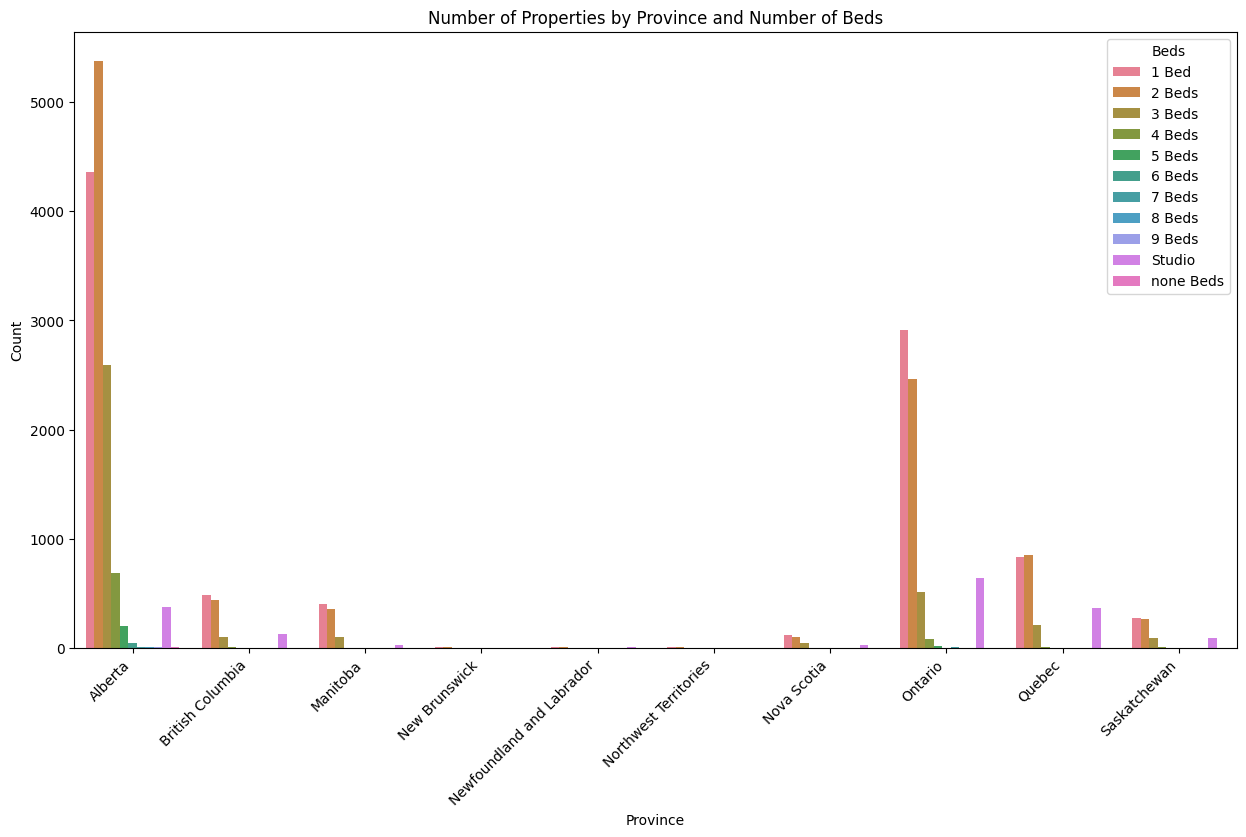

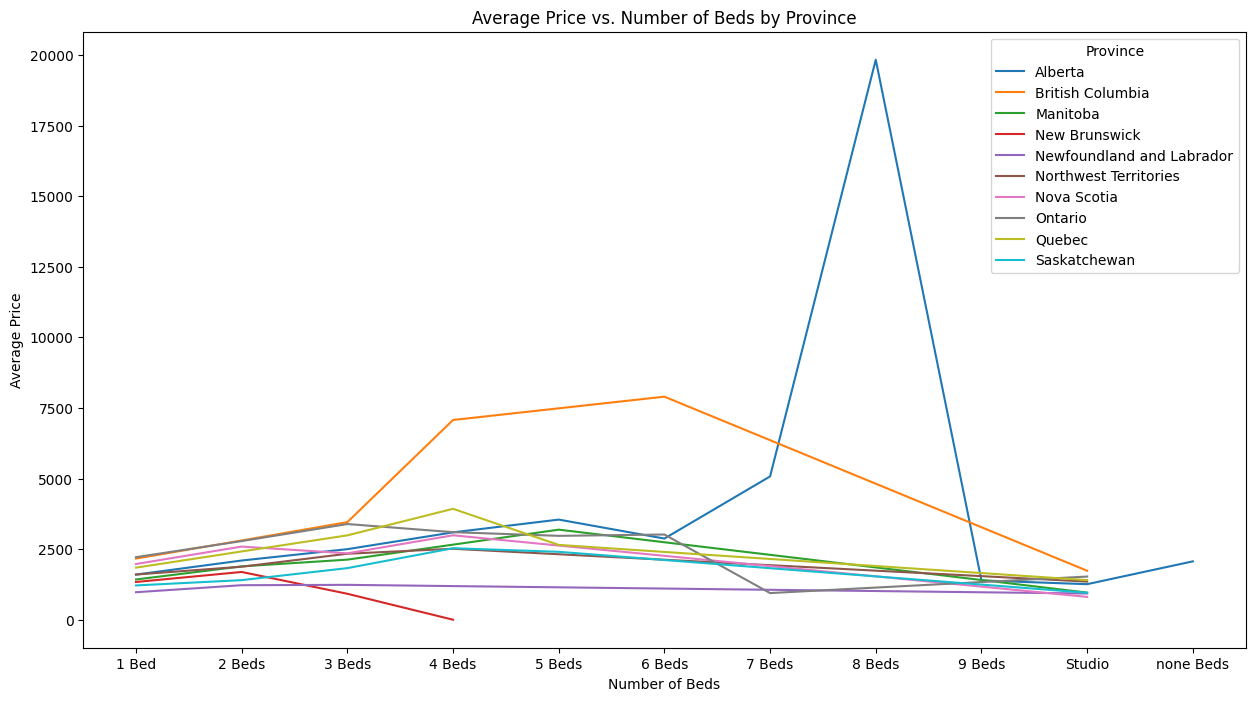

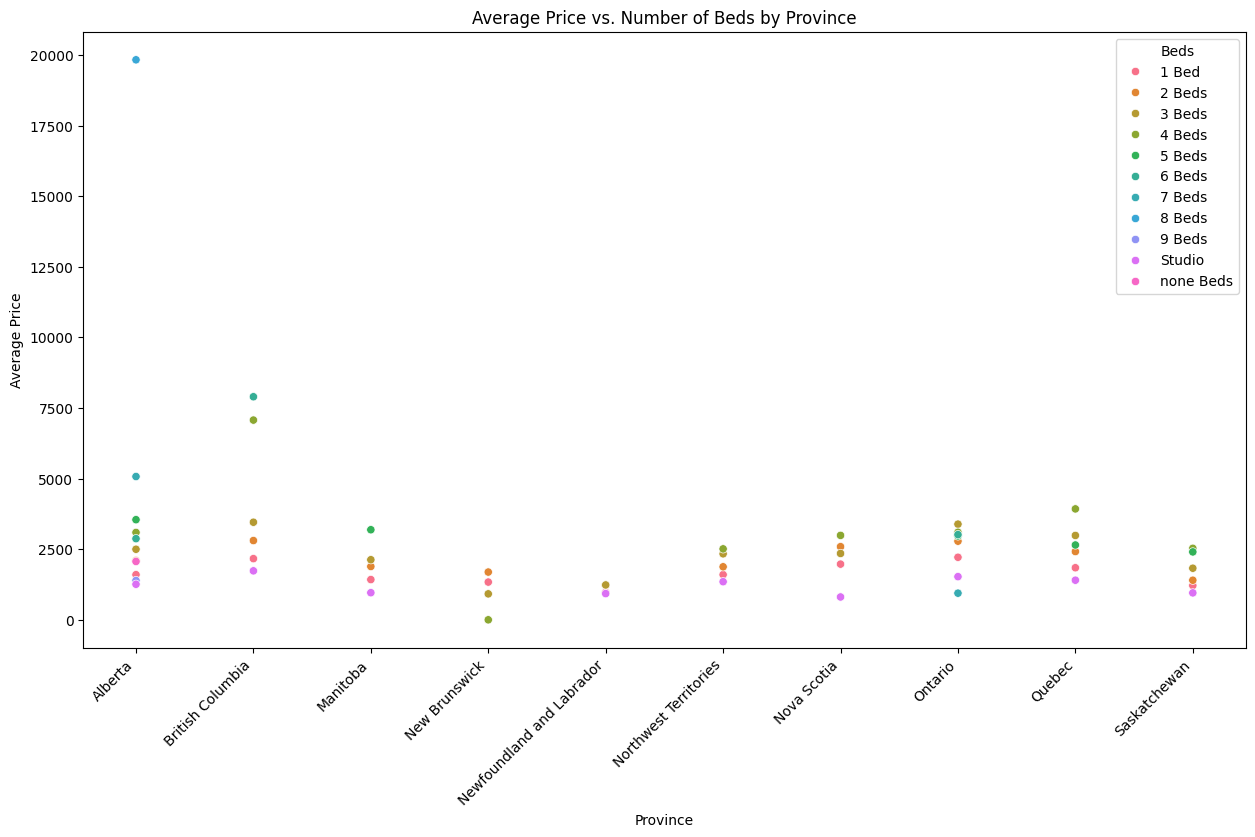

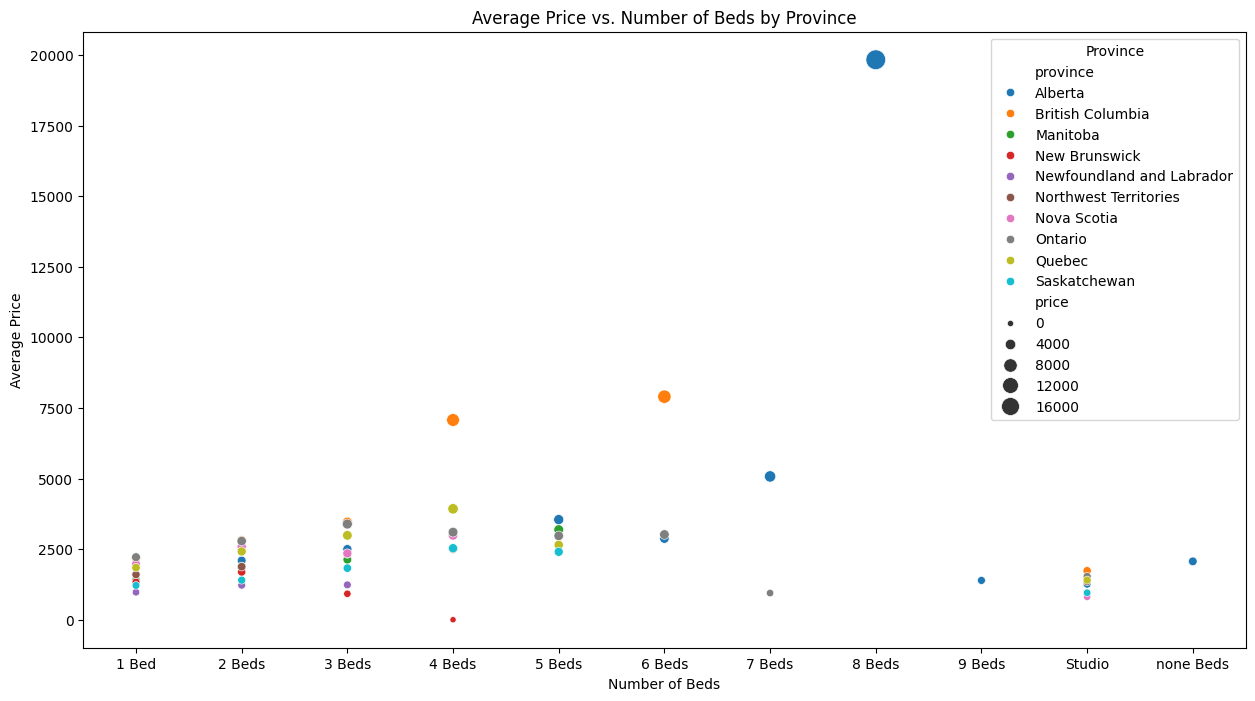

In [82]:
# # Create a bar chart for bed_counts

# Create a bar chart for bed_counts with province on the x-axis and count on the y-axis, with different colors for each number of beds
plt.figure(figsize=(15, 8))
sns.barplot(x='province', y='count', hue='beds', data=bed_counts)
plt.title('Number of Properties by Province and Number of Beds')
plt.xlabel('Province')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Beds')
plt.show()

# Create a line chart for avg_price_by_beds with province on the x-axis and average price on the y-axis, with different lines for each number of beds
plt.figure(figsize=(15, 8))
sns.lineplot(x='beds', y='price', hue='province', data=avg_price_by_beds)
plt.title('Average Price vs. Number of Beds by Province')
plt.xlabel('Number of Beds')
plt.ylabel('Average Price')
plt.legend(title='Province')
plt.show()

# Create a box plot for avg_price_by_beds with province on the x-axis and average price on the y-axis, with different boxes for each number of beds
plt.figure(figsize=(15, 8))
sns.scatterplot(x='province', y='price', hue='beds', data=avg_price_by_beds)
plt.title('Average Price vs. Number of Beds by Province')
plt.xlabel('Province')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Beds')
plt.show()


# Create a scatter plot for avg_price_by_beds
plt.figure(figsize=(15, 8))
sns.scatterplot(x='beds', y='price', hue='province', data=avg_price_by_beds, size='price', sizes=(20, 200))
plt.title('Average Price vs. Number of Beds by Province')
plt.xlabel('Number of Beds')
plt.ylabel('Average Price')
plt.legend(title='Province')
plt.show()